### 音声のプレビュー

In [1]:
import numpy as np
from IPython.display import Audio

In [2]:
# Audio('../data/drums.wav') #それなりに時間がかかる

### ライブラリー等
LibROSA https://qiita.com/lilacs/items/a331a8933ec135f63ab1

いろいろ https://heartstat.net/2021/05/15/python_asp_library/

In [3]:
import librosa
import librosa.display

In [4]:
y,sr=librosa.load('../data/drums.wav')

In [5]:
y.shape

(4071168,)

In [ ]:
Audio(y[2000000:2300000], rate=sr)

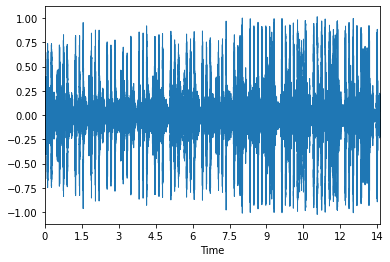

In [7]:
mpl_collection = librosa.display.waveplot(y[2000000:2300000], sr=sr) #プロットもできる

In [8]:
D = librosa.stft(y)  # STFT
S, phase = librosa.magphase(D)  # 複素数を強度と位相へ変換
Sdb = librosa.amplitude_to_db(S)  # 強度をdb単位へ変換


/opt/conda/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


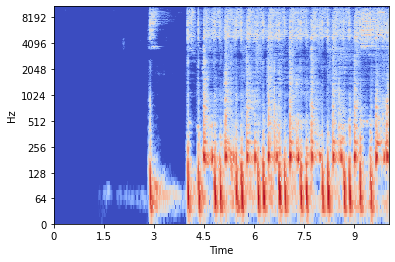

In [9]:
librosa.display.specshow(Sdb[:, int(0/0.023138832997987926):int(10/0.023138832997987926)], sr=sr, x_axis='time', y_axis='log')  # スペクトログラムを表示
# 開始10秒地点
# うまく抽出できてそう

In [10]:
# tmp=librosa.istft(S) #低音が苦手だけど一応スペクトルからだけでも再合成可能
# tmp=librosa.istft(D)

tmp=librosa.griffinlim(S[:, 0:int(10/0.023138832997987926)])  #位相推定付きフーリエ逆変換
# ええやん

In [ ]:
Audio(tmp,rate=sr)

In [12]:
tmp=librosa.griffinlim(
        librosa.db_to_amplitude(
            Sdb[:, 0:int(10/0.023138832997987926)]
        )
)  #位相推定付きフーリエ逆変換

# Sdbを振幅に逆変換してさらにフーリエ逆変換してもうまくいく

In [ ]:
Audio(tmp,rate=sr) # 